In [365]:
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (14, 7)

from keras.models import Sequential
from keras.layers import Dense,Activation,Flatten
from sklearn.preprocessing import MinMaxScaler

In [366]:
archivo = 'BRO.csv'

In [367]:
df = pd.read_csv(archivo,  parse_dates=[0], header=None,index_col=0, squeeze=True,names=['fecha','kg'])
df.head()

fecha
2016-01-09    574017
2016-01-16    588433
2016-01-23    590953
2016-01-30    600105
2016-02-06    600680
Name: kg, dtype: int64

In [368]:
print(df.index.min())
print(df.index.max())

2016-01-09 00:00:00
2020-12-26 00:00:00


In [369]:
df.describe()

count       260.000000
mean     254428.550000
std      114716.125282
min      105625.000000
25%      195936.250000
50%      223660.000000
75%      266680.250000
max      600680.000000
Name: kg, dtype: float64

In [370]:
meses =df.resample('M').mean()
meses.head()

fecha
2016-01-31    588377.00
2016-02-29    578901.50
2016-03-31    532961.75
2016-04-30    562863.20
2016-05-31    541792.50
Freq: M, Name: kg, dtype: float64

In [371]:
años =df.resample('Y').mean()
años

fecha
2016-12-31    405361.884615
2017-12-31    243903.403846
2018-12-31    201563.019231
2019-12-31    225181.730769
2020-12-31    196132.711538
Freq: A-DEC, Name: kg, dtype: float64

# Se está trabajando por semanas, por lo cual cada año tiene 52 datos

In [372]:
print(len(df['2016']))
print(len(df['2017']))
print(len(df['2018']))
print(len(df['2019']))
print(len(df['2020']))

52
52
52
52
52


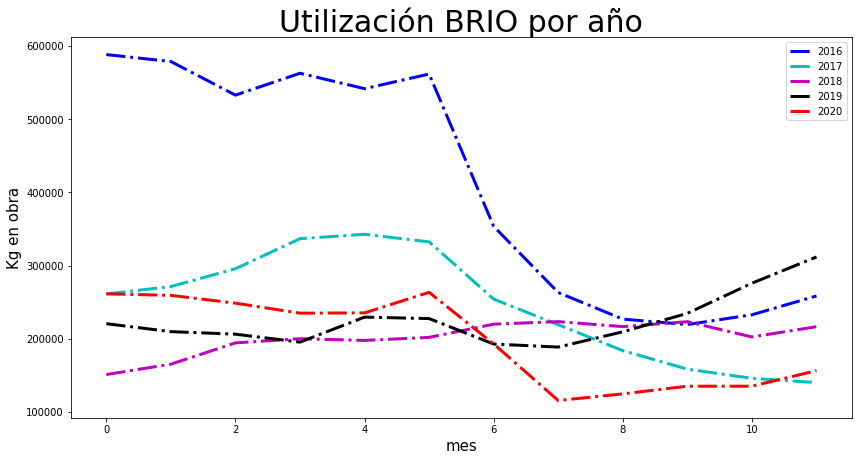

In [373]:
plt.plot(meses['2016'].values,color='b',linewidth=3,linestyle='-.',label="2016")
plt.plot(meses['2017'].values,color="c",linewidth=3,linestyle="-.",label="2017")
plt.plot(meses['2018'].values,color="m",linewidth=3,linestyle="-.",label="2018")
plt.plot(meses['2019'].values,color="k",linewidth=3,linestyle="-.",label="2019")
plt.plot(meses['2020'].values,color="r",linewidth=3,linestyle="-.",label="2020")
plt.xlabel("mes",size= 15)
plt.ylabel("Kg en obra",size= 15)
plt.title("Utilización BRIO por año",size= 30)
plt.legend(['2016','2017','2018','2019','2020'])

Se visualiza un comportamiento similar desde 2017-2020, acentuando la utilización entre marzo y mayo, también se observa una tendencia al alza en el último tramo del año, en particular 2017 presenta una mayor utilización marzo-mayo y un comportamiento estable en el último tramo. Se destaca que 2016 presenta un comportamiento similar solo el último trimestre, se puede notar una alta utilización prologanda desde 2015 hasta mayo del 2016, donde se atribuye este comportamiento al inicio de devolución simultanea de varios proyectos de magnitud considerable.

Text(0.5, 1.0, 'Utilización último trimestre')

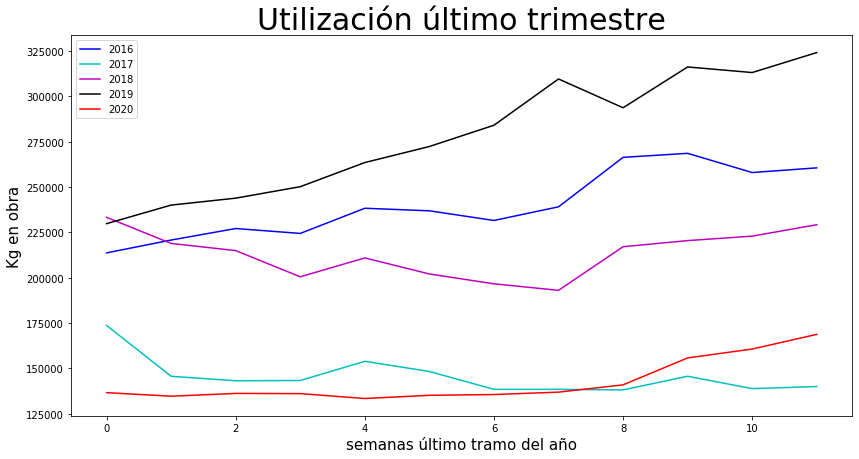

In [374]:
Fin2016 = df['2016-10-15':'2016-12-31']
plt.plot(Fin2016.values,color='b')
Fin2017 = df['2017-10-14':'2017-12-30']
plt.plot(Fin2017.values,color="c")
Fin2018 = df['2018-10-13':'2018-12-29']
plt.plot(Fin2018.values,color="m")
Fin2019 = df['2019-10-12':'2019-12-28']
plt.plot(Fin2019.values,color="k")
Fin2020 = df['2020-10-10':'2020-12-26']
plt.plot(Fin2020.values,color="r")
plt.legend(['2016','2017','2018','2019','2020'])
plt.xlabel("semanas último tramo del año",size= 15)
plt.ylabel("Kg en obra",size= 15)
plt.title("Utilización último trimestre",size= 30)

En general se verifica el comportamiento alcista los últimos tramos de cada año, siendo más patente en el mes de diciembre, sin embargo, 2017 se presenta más estable en este transcurso. 

In [375]:
#pronosticar la 8va semana a partir de las 7 anteriores, con el fin de observar 1 tramo completo y luego predecir con el incompleto
latest_data = 7 
    
# convertir serie de tiempo a ML supervisado
def series_to_supervised(data, n_in=1, n_out=1, dropnan=True):
    n_vars = 1 if type(data) is list else data.shape[1]
    df = pd.DataFrame(data)
    cols, names = list(), list()
    # secuencia de entrada (t-n, ... t-1)
    for i in range(n_in, 0, -1):
        cols.append(df.shift(i))
        names += [('var%d(t-%d)' % (j+1, i)) for j in range(n_vars)]
    # secuencia de pronóstico (t, t+1, ... t+n)
    for i in range(0, n_out):
        cols.append(df.shift(-i))
        if i == 0:
            names += [('var%d(t)' % (j+1)) for j in range(n_vars)]
        else:
            names += [('var%d(t+%d)' % (j+1, i)) for j in range(n_vars)]
    
    agg = pd.concat(cols, axis=1)
    agg.columns = names
    
    if dropnan:
        agg.dropna(inplace=True)
    return agg
 
# cargar data set
values = df.values
# asegurando que los datos sean numeros reales
values = values.astype('float32')
# normalizar para mejorar la eficiencia de la red y ahorrar recursos
scaler = MinMaxScaler(feature_range=(-1, 1))
values=values.reshape(-1, 1) 
scaled = scaler.fit_transform(values)

reframed = series_to_supervised(scaled, latest_data, 1)
reframed.head()

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1),var1(t)
7,0.892283,0.950523,0.960703,0.997677,1.000000,0.881217,0.892177,0.874668
8,0.950523,0.960703,0.997677,1.000000,0.881217,0.892177,0.874668,0.727473
9,0.960703,0.997677,1.000000,0.881217,0.892177,0.874668,0.727473,0.831320
10,0.997677,1.000000,0.881217,0.892177,0.874668,0.727473,0.831320,0.693690
11,1.000000,0.881217,0.892177,0.874668,0.727473,0.831320,0.693690,0.653202


In [376]:
n_total = 260
n_test_weeks = 103
# separación de datos
values = reframed.values
n_train_weeks = n_total - (n_test_weeks+latest_data) 
train = values[:n_train_weeks, :]
test = values[n_train_weeks:, :]
# definir entrada y salida
x_train, y_train = train[:, :-1], train[:, -1]
x_val, y_val = test[:, :-1], test[:, -1]
# reshape necesario
x_train = x_train.reshape((x_train.shape[0], 1, x_train.shape[1]))
x_val = x_val.reshape((x_val.shape[0], 1, x_val.shape[1]))
print(x_train.shape, y_train.shape, x_val.shape, y_val.shape)

(150, 1, 7) (150,) (103, 1, 7) (103,)


In [377]:
# Definiendo modelo, sus respectivas capas con funciones de activación, y para el modelo en total, la función de coste, el optimizador y la métrica.
def crear_modeloFF():
    model = Sequential() 
    model.add(Dense(latest_data, input_shape=(1,latest_data),activation='tanh'))
    model.add(Flatten())
    model.add(Dense(1, activation='tanh'))
    model.compile(loss='mean_absolute_error',optimizer='Adam',metrics=["mse"])
    model.summary()
    return model

In [378]:
# se definen la cantidad de iteraciones para entrenar
EPOCHS=120
# se llama al modelo y finalmente se ejecuta el entrenamiento 
model = crear_modeloFF()
 
history=model.fit(x_train,y_train,epochs=EPOCHS,validation_data=(x_val,y_val),batch_size=PASOS)

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_28 (Dense)             (None, 1, 7)              56        
_________________________________________________________________
flatten_14 (Flatten)         (None, 7)                 0         
_________________________________________________________________
dense_29 (Dense)             (None, 1)                 8         
Total params: 64
Trainable params: 64
Non-trainable params: 0
_________________________________________________________________
Epoch 1/120
22/22 [==============================] - 0s 11ms/step - loss: 0.1304 - mse: 0.0402 - val_loss: 0.1256 - val_mse: 0.0259
Epoch 2/120
22/22 [==============================] - 0s 2ms/step - loss: 0.1222 - mse: 0.0376 - val_loss: 0.1228 - val_mse: 0.0235
Epoch 3/120
22/22 [==============================] - 0s 2ms/step - loss: 0.1162 - mse: 0.0358 - val_loss: 0.1146 - val_mse: 

22/22 [==============================] - 0s 1ms/step - loss: 0.0710 - mse: 0.0161 - val_loss: 0.0712 - val_mse: 0.0098
Epoch 58/120
22/22 [==============================] - 0s 1ms/step - loss: 0.0705 - mse: 0.0159 - val_loss: 0.0712 - val_mse: 0.0099
Epoch 59/120
22/22 [==============================] - 0s 1ms/step - loss: 0.0693 - mse: 0.0157 - val_loss: 0.0718 - val_mse: 0.0095
Epoch 60/120
22/22 [==============================] - 0s 1ms/step - loss: 0.0690 - mse: 0.0158 - val_loss: 0.0702 - val_mse: 0.0097
Epoch 61/120
22/22 [==============================] - 0s 1ms/step - loss: 0.0705 - mse: 0.0161 - val_loss: 0.0703 - val_mse: 0.0096
Epoch 62/120
22/22 [==============================] - 0s 1ms/step - loss: 0.0689 - mse: 0.0153 - val_loss: 0.0704 - val_mse: 0.0095
Epoch 63/120
22/22 [==============================] - 0s 1ms/step - loss: 0.0685 - mse: 0.0153 - val_loss: 0.0709 - val_mse: 0.0098
Epoch 64/120
22/22 [==============================] - 0s 1ms/step - loss: 0.0687 - mse: 0

22/22 [==============================] - 0s 1ms/step - loss: 0.0599 - mse: 0.0123 - val_loss: 0.0646 - val_mse: 0.0079
Epoch 120/120
22/22 [==============================] - 0s 1ms/step - loss: 0.0595 - mse: 0.0124 - val_loss: 0.0650 - val_mse: 0.0085


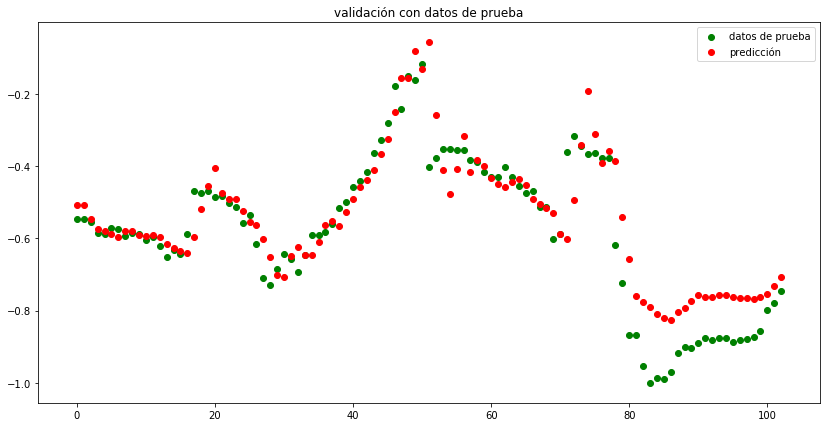

In [379]:
# validación modelo
results=model.predict(x_val)
plt.scatter(range(len(y_val)),y_val,c='g')
plt.scatter(range(len(results)),results,c='r')
plt.title('validación con datos de prueba')
plt.legend(['datos de prueba','predicción'])
plt.show()

En principio se visualizan predicciones bastante acertadas

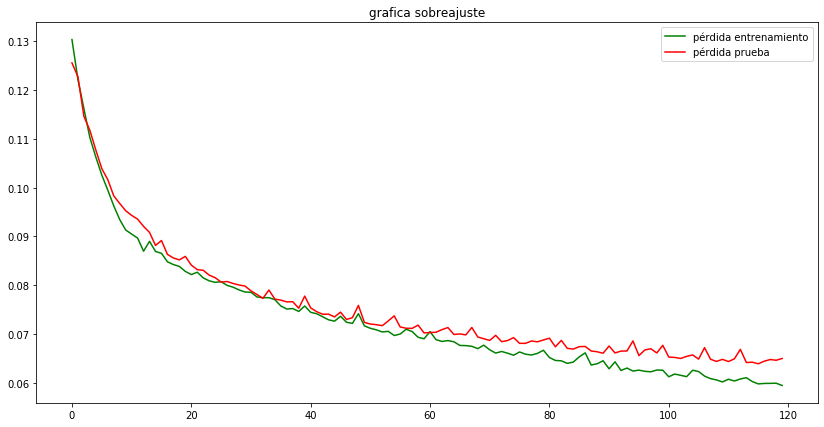

In [380]:
# revisión sobreajuste
plt.plot(history.history['loss'],c='g')
plt.plot(history.history['val_loss'],c='r')
plt.title('grafica sobreajuste')
plt.legend(['pérdida entrenamiento','pérdida prueba'])
plt.show()

Dado este gráfico se puede concluir como primera que impresión no hay sobreajuste, ya que la pérdida de prueba es similar a la de entrenamiento.

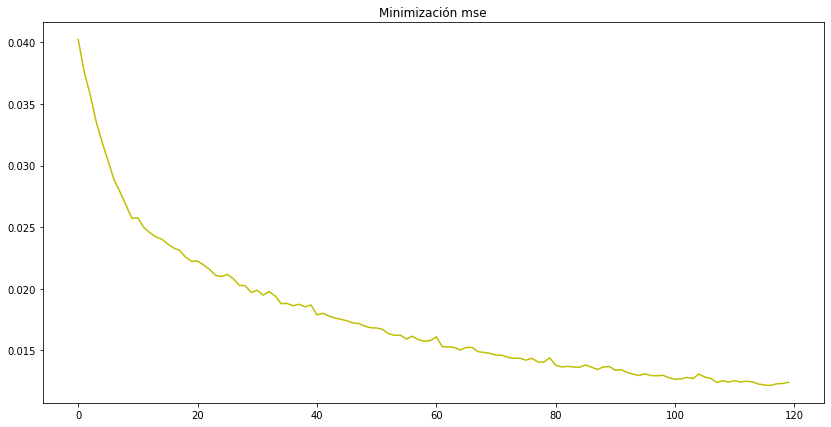

In [381]:
#gráfica métrica
plt.title('Minimización mse')
plt.plot(history.history['mse'],color = 'y')
plt.show()

In [382]:
# se reescalan lo datos y se compara predicción vs real.
compara = pd.DataFrame(np.array([y_val, [x[0] for x in results]])).transpose()
compara.columns = ['real', 'prediccion']

inverted = scaler.inverse_transform(compara.values)

comparar = pd.DataFrame(inverted)
comparar.columns = ['real', 'prediccion']
comparar['diferencia'] = comparar['real'] - comparar['prediccion']
comparar

,real,prediccion,diferencia
0,218013.0,227460.234375,-9447.234375
1,218263.0,227503.968750,-9240.968750
2,216222.0,217727.734375,-1505.734375
3,208691.0,211034.421875,-2343.421875
4,207466.0,210004.953125,-2538.953125
...,...,...,...
98,136838.0,163169.390625,-26331.390625
99,140861.0,164728.796875,-23867.796875
100,155719.0,166285.531250,-10566.531250
101,160614.0,171850.890625,-11236.890625


In [383]:
comparar.describe()

,real,prediccion,diferencia
count,103.000000,103.000000,103.000000
mean,210471.031250,218704.296875,-8233.135742
std,51924.253906,43267.566406,21455.964844
min,105625.000000,148590.390625,-85753.687500
25%,179429.000000,192054.148438,-22304.773438
50%,212057.000000,213843.296875,-2773.750000
75%,248623.992188,244061.015625,4162.976562
max,324189.000000,339263.687500,59832.609375


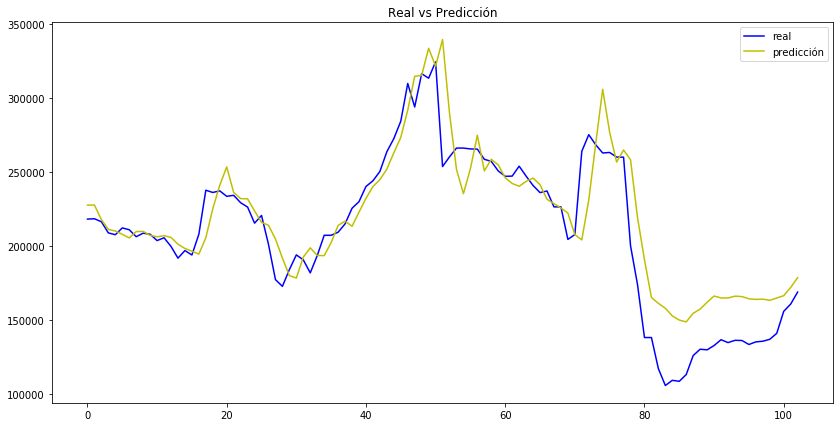

In [384]:
plt.title('Real vs Predicción')
comparar['real'].plot(color = 'b')
comparar['prediccion'].plot(c = 'y')
plt.legend(['real','predicción'])

In [385]:
# se definen últimas semanas reales
LastWeeks = df['2020-09-26':'2020-12-26']
LastWeeks

fecha
2020-09-26    129722
2020-10-03    132629
2020-10-10    136556
2020-10-17    134595
2020-10-24    136131
2020-10-31    136025
2020-11-07    133328
2020-11-14    135087
2020-11-21    135522
2020-11-28    136838
2020-12-05    140861
2020-12-12    155719
2020-12-19    160614
2020-12-26    168726
Name: kg, dtype: int64

In [386]:
# se define el proceso de predicción real, o sea, para las primeras 7 semanas de 2021, dada 'LastWeeks'
values = LastWeeks.values
values = values.astype('float32')
values
values=values.reshape(-1, 1) 
scaled = scaler.fit_transform(values)
reframed = series_to_supervised(scaled, PASOS, 1)
reframed.drop(reframed.columns[[7]], axis=1, inplace=True)
reframed.head(7)

,var1(t-7),var1(t-6),var1(t-5),var1(t-4),var1(t-3),var1(t-2),var1(t-1)
7,-1.000000,-0.850938,-0.649574,-0.750128,-0.671367,-0.676802,-0.815096
8,-0.850938,-0.649574,-0.750128,-0.671367,-0.676802,-0.815096,-0.724900
9,-0.649574,-0.750128,-0.671367,-0.676802,-0.815096,-0.724900,-0.702594
10,-0.750128,-0.671367,-0.676802,-0.815096,-0.724900,-0.702594,-0.635114
11,-0.671367,-0.676802,-0.815096,-0.724900,-0.702594,-0.635114,-0.428828
12,-0.676802,-0.815096,-0.724900,-0.702594,-0.635114,-0.428828,0.333043
13,-0.815096,-0.724900,-0.702594,-0.635114,-0.428828,0.333043,0.584043


In [387]:
values = reframed.values
x_test = values[6:, :]
x_test = x_test.reshape((x_test.shape[0], 1, x_test.shape[1]))
print(x_test.shape)

(1, 1, 7)


In [388]:
x_test

array([[[-0.8150959 , -0.72489977, -0.7025943 , -0.6351142 ,
         -0.42882776,  0.3330431 ,  0.58404255]]], dtype=float32)

In [389]:
def agregarNuevoValor(x_test,nuevoValor):
    for i in range(x_test.shape[2]-1):
        x_test[0][0][i] = x_test[0][0][i+1]
    x_test[0][0][x_test.shape[2]-1] = nuevoValor
    return x_test

In [390]:
results = []
for i in range(7):
    parcial = model.predict(x_test)
    results.append(parcial[0])
    print(x_test)
    x_test = agregarNuevoValor(x_test,parcial[0])

[[[-0.8150959  -0.72489977 -0.7025943  -0.6351142  -0.42882776
    0.3330431   0.58404255]]]
[[[-0.72489977 -0.7025943  -0.6351142  -0.42882776  0.3330431
    0.58404255  0.51977056]]]
[[[-0.7025943  -0.6351142  -0.42882776  0.3330431   0.58404255
    0.51977056  0.62483346]]]
[[[-0.6351142  -0.42882776  0.3330431   0.58404255  0.51977056
    0.62483346  0.5974116 ]]]
[[[-0.42882776  0.3330431   0.58404255  0.51977056  0.62483346
    0.5974116   0.6047383 ]]]
[[[0.3330431  0.58404255 0.51977056 0.62483346 0.5974116  0.6047383
   0.7075988 ]]]
[[[0.58404255 0.51977056 0.62483346 0.5974116  0.6047383  0.7075988
   0.7438837 ]]]


In [391]:
adimen = [x for x in results]    
print(adimen)
inverted = scaler.inverse_transform(adimen)
inverted

[array([0.51977056], dtype=float32), array([0.62483346], dtype=float32), array([0.5974116], dtype=float32), array([0.6047383], dtype=float32), array([0.7075988], dtype=float32), array([0.7438837], dtype=float32), array([0.74625003], dtype=float32)]


array([[159360.56197973],
       [161409.49873674],
       [160874.71699387],
       [161017.60273212],
       [163023.58844676],
       [163731.21704066],
       [163777.36470998]])

Text(0.5, 1.0, 'Primeras 7 semanas 2021')

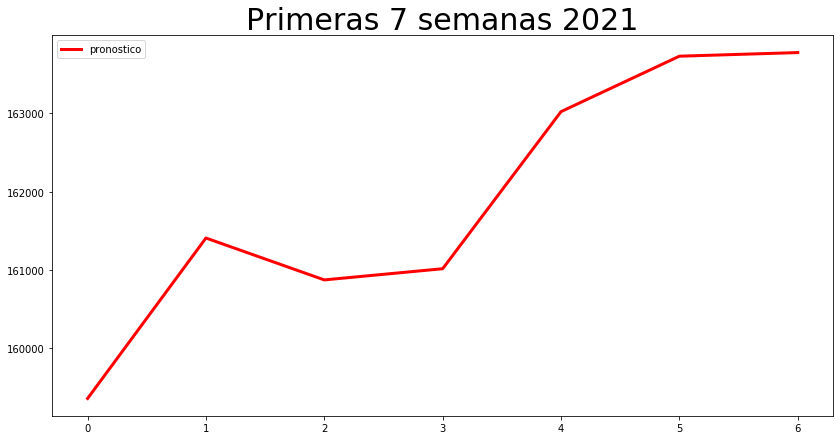

In [392]:
prediccion2021 = pd.DataFrame(inverted)
prediccion2021.columns = ['pronostico']
prediccion2021.plot(c='r',linewidth=3)
plt.title('Primeras 7 semanas 2021',size=30)
#prediccion2021.to_excel('pronosticoBRIO-60-40-130.xlsx')

In [393]:
prediccion2021

,pronostico
0,159360.561980
1,161409.498737
2,160874.716994
3,161017.602732
4,163023.588447
5,163731.217041
6,163777.364710


In [394]:
#comprobando pronóstico
i=2
j=6
for fila in prediccion2021.pronostico:
    if i <=30:    
        LastWeeks.loc['2021'+ '-1-' + str(i) + ' 00:00:00'] = fila
        i+=7
    else:
        LastWeeks.loc['2021'+ '-2-' + str(j) + ' 00:00:00'] = fila
        j+=7
    print(fila)
LastWeeks.tail(14)

159360.5619797349
161409.4987367378
160874.7169938652
161017.6027321171
163023.58844676465
163731.21704065532
163777.36470997895


fecha
2020-11-14 00:00:00    135087.000000
2020-11-21 00:00:00    135522.000000
2020-11-28 00:00:00    136838.000000
2020-12-05 00:00:00    140861.000000
2020-12-12 00:00:00    155719.000000
2020-12-19 00:00:00    160614.000000
2020-12-26 00:00:00    168726.000000
2021-1-2 00:00:00      159360.561980
2021-1-9 00:00:00      161409.498737
2021-1-16 00:00:00     160874.716994
2021-1-23 00:00:00     161017.602732
2021-1-30 00:00:00     163023.588447
2021-2-6 00:00:00      163731.217041
2021-2-13 00:00:00     163777.364710
Name: kg, dtype: float64

In [395]:
LastWeeks

fecha
2020-09-26 00:00:00    129722.000000
2020-10-03 00:00:00    132629.000000
2020-10-10 00:00:00    136556.000000
2020-10-17 00:00:00    134595.000000
2020-10-24 00:00:00    136131.000000
2020-10-31 00:00:00    136025.000000
2020-11-07 00:00:00    133328.000000
2020-11-14 00:00:00    135087.000000
2020-11-21 00:00:00    135522.000000
2020-11-28 00:00:00    136838.000000
2020-12-05 00:00:00    140861.000000
2020-12-12 00:00:00    155719.000000
2020-12-19 00:00:00    160614.000000
2020-12-26 00:00:00    168726.000000
2021-1-2 00:00:00      159360.561980
2021-1-9 00:00:00      161409.498737
2021-1-16 00:00:00     160874.716994
2021-1-23 00:00:00     161017.602732
2021-1-30 00:00:00     163023.588447
2021-2-6 00:00:00      163731.217041
2021-2-13 00:00:00     163777.364710
Name: kg, dtype: float64

In [396]:
#prediccion2021.to_excel('pronosticoBRIO-60-40-130.xlsx')